# Probostat Data Processing Notebook
This notebook provides a concise and user-friendly interface to work with Probostat data files. Follow the steps to load, view, manipulate, and export your data.


---

## Step 0: Installing external packages missing on the system
This project is using Python packages developed by members of the open-source community, and they are necessary for you to be able to run these scripts.  
If you have a fresh install of Python on this machine, you will need to install them.  

If you already installed the prerequisites, feel free to skip.

In [1]:
#!pip install -r requirements.txt

*Hint*: I've commented the line above so it doesn't automatically run when you click `Run all`. To make it runnable, delete the `#` symbol at the beginning of the line. (Keep the `!` symbol)


## Step 1: Load Probostat Files into `brlopack` object
First we will import the package I have made for data processing, called `brlopack`.

In [2]:
import brlopack

**Note**: If you ever run into some sort of an issue, not being sure what is `brlopack`, what is `Brillo`, refer to [this notebook](tutorials/1.%20What%20is%20brlopack%20and%20Brillo.ipynb).

### Initialize the BrloPack object
We need to make a `brlopack` object. We can name it whatever we want. Let's say we name it `probostat_session`.  

After that we will load some files into that object. Then we can do whichever operations/functions/methods we want over the loaded data.

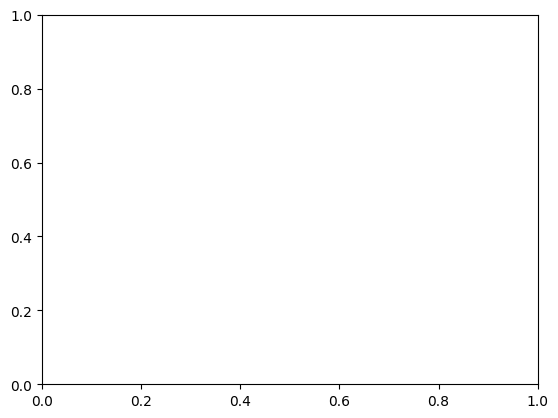

In [3]:
probostat_session = brlopack.brlopack()

Now let's load the **Probostat** data files into `probostat_session`.  
Please make sure the files were exported from Origin in the `.csv` format :)  

You can find more details below (optinal):
<details><summary>Click here</summary>

Note 1: you may also choose to load files that were exported from `brlopack` (`.xslx` format)  
Note 2: `brlopack` can also work on **aixACCT** `.dat` files.

There's more than one way to select which files will be loaded:
1. Passing a list of filepaths to `.tellFiles()` method
2. Selecting the files through a **popup window** using `browseDirectories()` method
3. ~~Manually assigning it to the `.wantedFiles` variable~~ (preferrably avoid this)

You should use only one of these approaches, not more (comment out the other two you are not using with a '#' in the beginning of the line)
</details>

In [4]:
# Approach 1 - List of Probostat files to load
# you can use "relative" or "absolute" paths
probostat_files1 = [
    'data/probostat/new/BCTZ_16cikel za lukata loceno-2 point resistances.csv',
    'data/probostat/new/BCTZ_16cikel za lukata loceno-Flow.csv',
    'data/probostat/new/BCTZ_16cikel za lukata loceno-Keysiht MC.csv',
    'data/probostat/new/BCTZ_16cikel za lukata loceno-Temp.csv'
]
probostat_files2 = [
    'data/probostat/new2/BFO_BT_-TEMPLATE_5 nov nod za pec-2 point R [Ohm).csv',
    'data/probostat/new2/BFO_BT_-TEMPLATE_5 nov nod za pec-4 point R [Ohm].csv',
    'data/probostat/new2/BFO_BT_-TEMPLATE_5 nov nod za pec-Flow N2.csv',
    'data/probostat/new2/BFO_BT_-TEMPLATE_5 nov nod za pec-Keysiht MC (1).csv',
    'data/probostat/new2/BFO_BT_-TEMPLATE_5 nov nod za pec-Keysiht MC.csv',
    'data/probostat/new2\BFO_BT_-TEMPLATE_5 nov nod za pec-Seebeck.csv'
]
probostat_session.tellFiles(probostat_files2)

############################
# Approach 2 - window popup
#paket.browseDirectories()

############################
# Approach 3 - direct assignment NOT RECOMMENDED
#paket.wantedFiles = ['some files']

Let's see if it worked!

In [5]:
probostat_session.tellMeFiles()

['data/probostat/new2/BFO_BT_-TEMPLATE_5 nov nod za pec-2 point R [Ohm).csv',
 'data/probostat/new2/BFO_BT_-TEMPLATE_5 nov nod za pec-4 point R [Ohm].csv',
 'data/probostat/new2/BFO_BT_-TEMPLATE_5 nov nod za pec-Flow N2.csv',
 'data/probostat/new2/BFO_BT_-TEMPLATE_5 nov nod za pec-Keysiht MC (1).csv',
 'data/probostat/new2/BFO_BT_-TEMPLATE_5 nov nod za pec-Keysiht MC.csv',
 'data/probostat/new2\\BFO_BT_-TEMPLATE_5 nov nod za pec-Seebeck.csv']

Now we know which files `probostat_session` will try to load!   
Let's do that immediately.  

### Load the files into the `brlopack` object "`probostat_session`"
**Note**: Loading Probostat's files can take up to 1 or 2 minutes, because it is running a costly stitching operation over these `.csv` tables.  
Please be patient!

In [6]:
probostat_session.loadFiles()

**Note**: You should call `.loadFiles()` right after choosing your files (i.e. do not perform other operations inbetween the two).

## Step 2: View Data Structure and Content
You can explore the files, tables, and columns within the loaded data.


In [7]:
# Example: View the files loaded
loadedFiles = probostat_session.tellMeFiles()
loadedFiles

['Probostat']

**Question 1: Why does `tellMeFiles()` now give us one file** (named 'Probostat') **; when we loaded 4?**  
*Answer 1*
<details><summary>Click here</summary>

In the case of Probostat it is assumed that multiple loaded `.csv` files should be merged/stitched into a single `DataFrame`/table and it will show up as only one file (for now the default name is just `Probostat`).  

*Why?* Usually with Probostat multiple of those files refer to a single experiment/measurement period.
</details>

---

**Question 2: Ok, that's why it is only one file. But what if I want multiple Probostat files to stay separate files?**  
*Answer 2*
<details><summary>Click here</summary>

Shortly - `.csv` files WILL always be merged, `.xlsx` files WILL NOT be merged.  
So if you want to keep some Probostat files separate, import is as an `.xlsx` file.  
The `.xslx` files can be obtained by using the method `[brlopack object name here].exportToExcel()`. 

**Specific example of usage**
<details><summary>Click here</summary>

Let's say you've got a file structure like this:
```
experiments/
├── experiment1/
│   ├── measurement1.csv
│   ├── measurement2.csv
│   └── measurement3.csv
│
├── experiment2/
│   ├── measurement1.csv
│   └── measurement2.csv
│
└── experiment3/
    ├── measurement1.csv
    ├── measurement2.csv
    ├── measurement3.csv
    └── measurement4.csv

```

If you import all of them at the same time, that's no good.  

So here's what you do:
```
experiment1_session = brlopack.brlopack()
experiment1_files = [
    'experiments/experiment1/measurement1.csv',
    'experiments/experiment1/measurement2.csv',
    'experiments/experiment1/measurement3.csv',
]
experiment1_session.tellFiles(experiment1_files)
experiment1_session.exportToExcel()
```
This will create a distinct `.xlsx` file for each experiment.  
Let's say you rename them into something pretty, and your file structure now looks like this:

```
experiments/
├── experiment1/
│   └── same files like before...
│
├── experiment2/
│   └── same files like before...
│
├── experiment3/
│   └── same files like before...
│
└── brillo exports/
    ├── experiment1.xlsx
    ├── experiment2.xlsx
    └── experiment3.xlsx

```

Now you may work with them as separate
```
multi_experiment_session = brlopack.brlopack()
all_experiment_files = [
    'experiments/brillo exports/experiment1.xlsx',
    'experiments/brillo exports/experiment2.xlsx',
    'experiments/brillo exports/experiment3.xlsx'
]
multi_experiment_session.tellFiles(all_experiment_files)
# do whatever analysis you want, when you are done:
multi_experiment_session.exportToExcel()
```
When exported, each of the experiments will be a separate sheet in Excel!

</details>
</details>

---

**Question 3 (not important, feel free to skip): Why does it work like this?**  
*Answer 3*
<details><summary>Click here</summary>

Shortly - It made sense to design it like this for the specific constraints that we had at the time.  

Origin had a lot of problems when exporting all of the measured data from multiple sensors into a single `.csv` file. We had to export data of 2-3 sensors at the most per `.csv` file. Sensors did not necessarily all start to measure from the same point in time, nor did they finish at the same point in time, leading to a lot of `NaN` ("Not a number") values in the table and to crashing. That's why we stitch them back here in the `brlopack` Python package (and for the usecase thus far, we could always assume that Probostat's `.csv` files always need to be stitched)

</details>

---

#### Now let us move onto seeing the table within that file!

In [8]:
# Example: View the tables in a specific file
#tableNames = probostat_session.tellMeTablesInFile(loadedFiles[0])
tableNames = probostat_session.tellMeTablesInFile('Probostat')
tableNames

['table']

**Note**: With Probostat's `.csv` files, there will only be one table in the beginning.  
We will change this in the next step!

Let us save this table in a variable and try to peek into its contents!

In [9]:
table = probostat_session.data['Probostat']['table']
table

,time [min],2wR_fwd [Ohm],2wR_rev [Ohm],4wR_fwd [Ohm],4wR_rev [Ohm],flow N2 [ml/min],Setpoint vs Time,R positive (1V) [Ohm]_x,R negative (1V) [Ohm]_x,R positive (1V) [Ohm]_y,R negative (1V) [Ohm]_y,Delta T [C],Thermovoltage forw [V],Seebeck (back thermo) [V/K],Thermovoltage back [V]
0,0.000000,2247681.0,2240465.0,2258938.0,2240144.0,201.527542,0.0,2.240947e+06,2.240866e+06,2.240947e+06,2.240866e+06,-0.155928,0.000215,0.000824,-0.000129
1,1.207483,2247080.0,2239462.0,2257562.0,2239304.0,201.406982,0.0,2.240259e+06,2.240023e+06,2.240259e+06,2.240023e+06,-0.058652,0.000077,0.001210,-0.000071
2,2.471217,2245283.0,2238557.0,2257062.0,2238487.0,201.244064,0.0,2.239346e+06,2.238884e+06,2.239346e+06,2.238884e+06,-0.108300,0.000030,-0.000275,0.000030
3,3.681883,2244550.0,2237858.0,2256478.0,2237594.0,200.969009,0.0,2.238108e+06,2.237912e+06,2.238108e+06,2.237912e+06,-0.088752,0.000215,0.001972,-0.000175
4,4.892600,2243539.0,2236414.0,2254737.0,2236204.0,200.931763,0.0,2.235721e+06,2.235341e+06,2.235721e+06,2.235341e+06,-0.126226,0.000039,0.000743,-0.000094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,811.476450,NaN,NaN,NaN,NaN,203.671570,0.0,-3.322259e+10,1.102536e+10,-3.322259e+10,1.102536e+10,6.021394,0.000132,0.000076,0.000460
672,812.697417,NaN,NaN,NaN,NaN,204.057602,0.0,-3.067485e+10,1.015228e+10,-3.067485e+10,1.015228e+10,5.930587,0.001278,0.000013,0.000079
673,813.918733,NaN,NaN,NaN,NaN,204.538986,0.0,-2.293578e+10,1.158749e+10,-2.293578e+10,1.158749e+10,5.925906,0.000099,-0.000021,-0.000123
674,815.149600,NaN,NaN,NaN,NaN,204.937012,0.0,-2.127660e+10,1.364256e+10,-2.127660e+10,1.364256e+10,5.906636,0.000029,0.000067,0.000393


This is kind of ugly, simply because there's a lot of columns and rows. This would be ok for a smaller table.  
By default it chose to show you only the first and last few rows. Also it had too many columns, so it broke down the output in three parts.  

This output is overwhelming let's consider something else...

#### Let's see all of the columns in this table!

In [10]:
# Example: View the columns in a specific table
#columnNames = paket.tellMeColumnsInTable(loadedFiles[0], tableNames[0])
columnNames = probostat_session.tellMeColumnsInTable('Probostat', 'table')
columnNames

['time [min]',
 '2wR_fwd [Ohm]',
 '2wR_rev [Ohm]',
 '4wR_fwd [Ohm]',
 '4wR_rev [Ohm]',
 'flow N2 [ml/min]',
 'Setpoint vs Time',
 'R positive (1V) [Ohm]_x',
 'R negative (1V) [Ohm]_x',
 'R positive (1V) [Ohm]_y',
 'R negative (1V) [Ohm]_y',
 'Delta T [C]',
 'Thermovoltage forw  [V]',
 'Seebeck (back thermo) [V/K]',
 'Thermovoltage back [V]']

#### Knowing the name of columns is vital to doing any changes to your data!
So keep these names in mind further on.  
You may need to copy paste some of them.

## Step 2.5 utilizing the DataFrame
We should note that the tables in `brlopack` are actually implemented using the popular `Pandas` package.  
Those tables are known as `DataFrame`s, which we can demonstrate by asking Python of the data type, like so:  

In [11]:
type(table)

pandas.core.frame.DataFrame

`DataFrame`s have a lot of powerful methods.  
Let's look at the simple example of `.info()`, offering a nice overview.  
There is also `.plot()` which may require more care (but in less lines of code than what is presented below)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 676 entries, 0 to 675
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   time [min]                   676 non-null    float64
 1   2wR_fwd [Ohm]                545 non-null    float64
 2   2wR_rev [Ohm]                548 non-null    float64
 3   4wR_fwd [Ohm]                535 non-null    float64
 4   4wR_rev [Ohm]                548 non-null    float64
 5   flow N2 [ml/min]             676 non-null    float64
 6   Setpoint vs Time             676 non-null    float64
 7   R positive (1V) [Ohm]_x      676 non-null    float64
 8   R negative (1V) [Ohm]_x      676 non-null    float64
 9   R positive (1V) [Ohm]_y      676 non-null    float64
 10  R negative (1V) [Ohm]_y      676 non-null    float64
 11  Delta T [C]                  676 non-null    float64
 12  Thermovoltage forw  [V]      676 non-null    float64
 13  Seebeck (back thermo

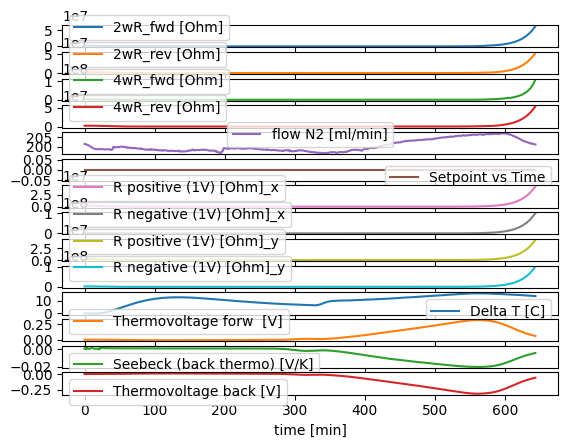

hist


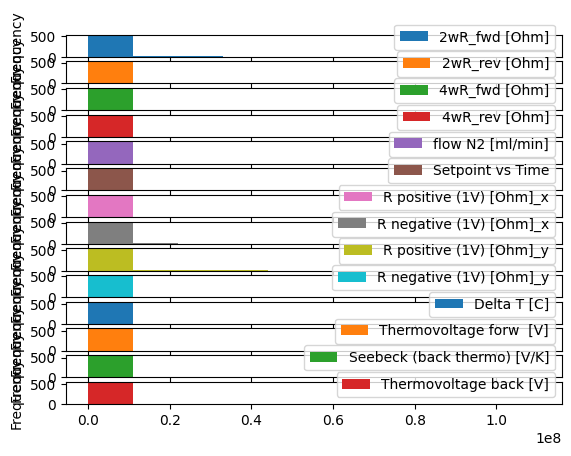

scatter
scatter requires an x and y column
box


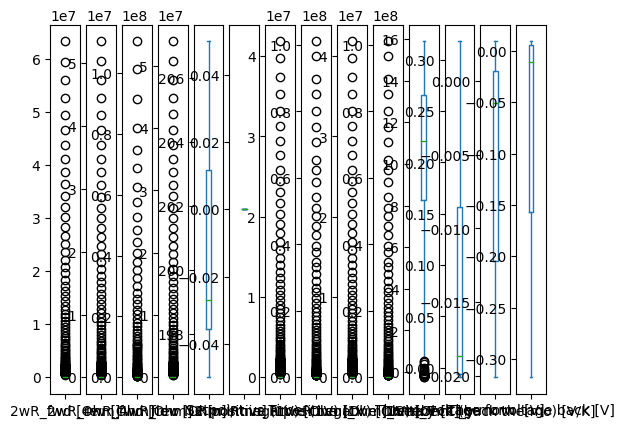

area
When stacked is True, each column must be either all positive or all negative. Column '2wR_rev [Ohm]' contains both positive and negative values
kde
singular matrix
density
singular matrix
hexbin
hexbin requires an x and y column


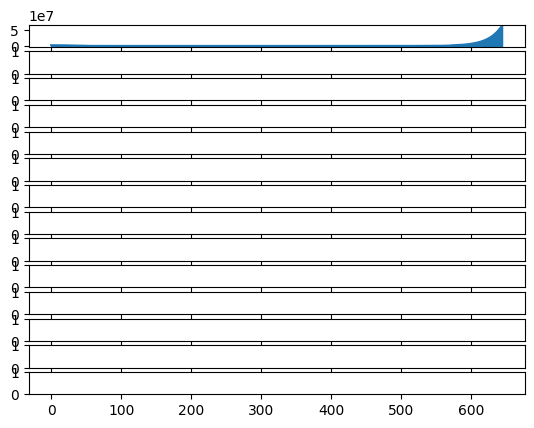

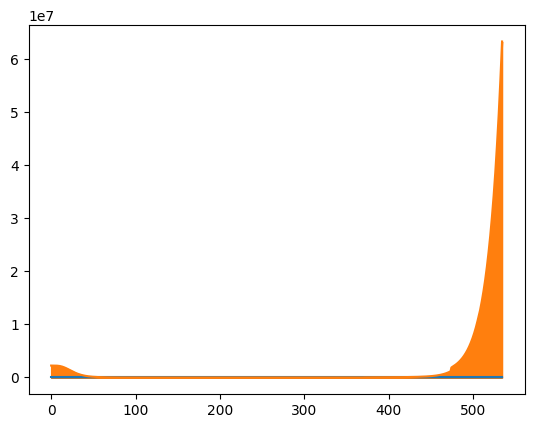

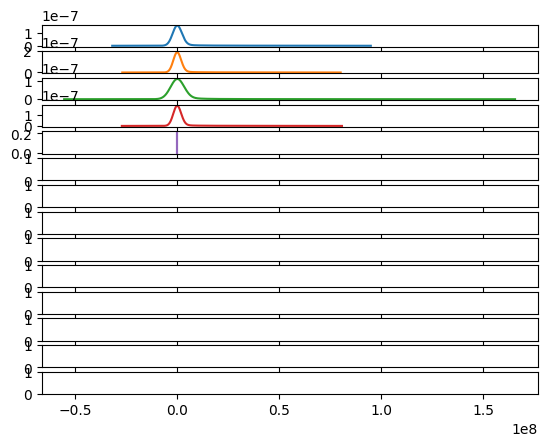

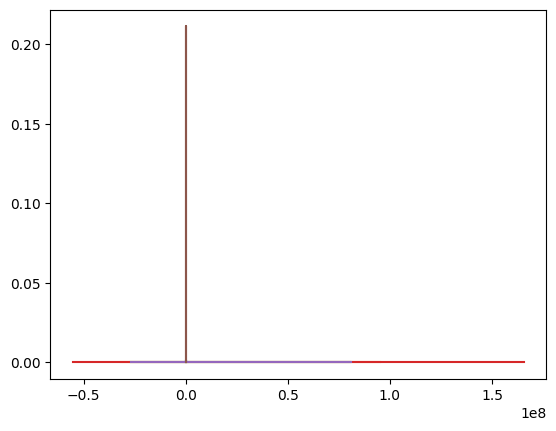

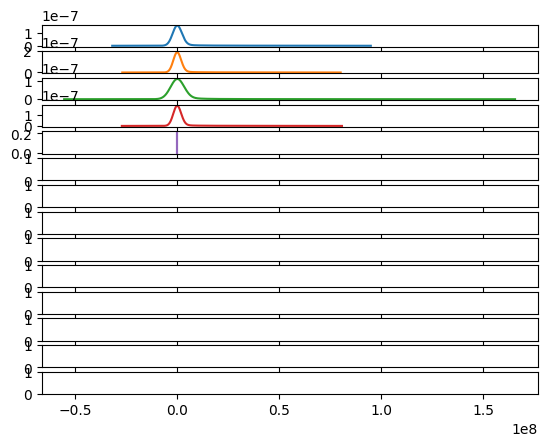

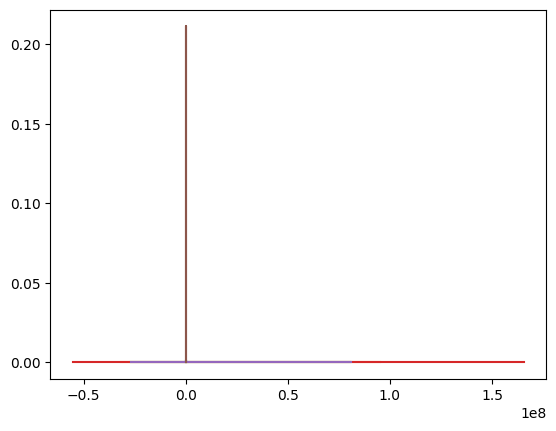

In [12]:
table.info()

plotKinds = ['line', 'hist', 'scatter', 'box', 'area', 'kde', 'density', 'hexbin']
newTable = table.dropna()
from matplotlib import pyplot as plt
for kind in plotKinds:
    print(kind)
    try:
        newTable.plot(x='time [min]', kind=kind, subplots=True)
    except:
        try:
            newTable.plot(kind=kind)
        except Exception as e:
            print(e)
            continue
    plt.show()

That's much nicer. There are some other methods such as:
- `.describe()` for a bunch of statistical info
- `.head()` for the first few rows
- `.tail()` for the last few rows  
etc...  

To learn more about the powerful options `Pandas` offers (that we mostly didn't use), Google [**"Pandas documentation"**](https://pandas.pydata.org/docs/) or [**"Pandas code examples"**](https://pandas.pydata.org/docs/user_guide/10min.html).  
Alternatively, consider asking ChatGPT **"How can I do [your idea] over a Pandas DataFrame?**.  

---
Ok, now we can get back to the main analysis.

# Step 3: Split the Probostat data
For Probostat experiments I saw, we want to separate the data into isothermic and dynamic  
(that is, depending on whether or not temp is stable, or changing).  

Here's how to do it:

In [13]:
probostat_session.separateData("Average (TCT+TCC)/2")

KeyError: 'Average (TCT+TCC)/2'

Now let us observe the effects of this operation!

In [ ]:
files = probostat_session.tellMeFiles()
for file in files:
    print(f"\nFile {file}:")
    for table in probostat_session.tellMeTablesInFile(file):
        columns = probostat_session.tellMeColumnsInTable(file, table)
        print(f"\tTable called {table} has these columns:")
        for column in columns:
            print(f"\t\t{column}")

## Step 4: Manipulate Data
Here you can perform essential data manipulations, such as unit conversion.


Here is a list of all of the operations that you can do (methods defined in the `brlopack` class):
 1. `divideConstant(columnName, newColumnName, constName)`
 2. `multiplyConstant(columnName, newColumnName, constName)`
 3. `subtractConstant(columnName, newColumnName, constName)`
 4. `addConstant(columnName, newColumnName, constName)`
 5. `inverseColumn(columnName, newColumnName, constName=None)`
 6. `squareColumn(columnName, newColumnName, constName=None)`
 7. `sqrtColumn(columnName, newColumnName, constName=None)`
 8. `averageTwoColumns(columnName, newColumnName, secondColumn)`
 9. `changeUnitOfConstant(constantName, unitPrefix)`
 10. `logN(columnName, newColumnName, constName=None)`
 11. `logConstant(columnName, newColumnName, constName)`

jedinica kolone??


In [ ]:
# Just put in any of the operations from above
probostat_session.squareColumn(columnName=columnNames[2], newColumnName="Kvadriran otpor [Ohm^2]")

A specific operation is `separateData(columnName)`. So far it was only needed for Probostat data (but could be applied elsewhere).
It looks at the data in a specific column and splits the whole table into segments where the data in that column is rising, dropping or staying around the same value.  

After doing this operation, free to go back to `tellMeTablesInFile` to see the newly created tables named: `rise`, `flat` and `drop`.

In [ ]:
probostat_session.separateData("Average (TCT+TCC)/2")

**Warning**: Make sure that you write the proper unit of measurement in SQUARE BRACKETS.
Otherwise unit conversions will not work, and the code might even crash.

---

**For advanced users - how to do any operation** beyond just these
<details><summary>Click here</summary>

You can open the `brlopack.py` to see how these ones were defined. You will notice they all follow the same pattern of arguments:
1. `columnName` (str) - the input column
2. `newColumnName` (str) - the output column
3. `constName` (str, optional) - the constant used somehow in the operation

You can also make your own method in this style using the `doOperation(operation, columnName, newColumnName, constName)` method.  

Just peek into the `brlopack.py` file to see how it's done. It utilizes the so-called "lambda functions" or alternatively you can assign a function to a variable (yes, this is possible in Python - you can store functions in variables and pass them to other functions).

If you are unsure about anything - do not hesitate to contact me over email or WhatsApp with your questions (especially if you tried to Google them or ask ChatGPT about it beforehand). If you don't have my contact info, ask around the office, someone has it!
</details>


## Step 4: Export Processed Data
Finally, you can export the processed data to an Excel file.

In [ ]:
# Export the data to an Excel file

probostat_session.exportToExcel()

# Step 5: Plotting
Here we can also select a subset of files, tables and columns for plotting, among other things.

In [ ]:
x_axis = columnNames[0]
y_axes = columnNames[2:5]
probostat_session.plotData(x_axis, y_axes, None, None, None, None, "Dotted", show=True, showLegend=True, showGrid=True)

## Conclusion
You have successfully loaded, viewed, manipulated, and exported Probostat data. Feel free to modify the code cells to work with your specific data and requirements! You may also contact me with any questions you might have over email or WhatsApp (ask around the office).